In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [18]:
from sklearn.datasets import make_moons, load_breast_cancer, make_classification, fetch_openml
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from  sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from ml_lib import AdaBoostClassifier as CustomAB
from ml_lib import KernelizedSVC
from utils.helpers import plot_decision_boundary
import matplotlib.pyplot as plt

In [3]:
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cab = CustomAB()
ab = AdaBoostClassifier(algorithm="SAMME")

cab.fit(X_train, y_train)
ab.fit(X_train, y_train)

y_pred_cab = cab.predict(X_test)
y_pred_ab = ab.predict(X_test)

print("CustomAB Accuracy", accuracy_score(y_test, y_pred_cab))
print("SklearnAB Accuracy", accuracy_score(y_test, y_pred_ab))


CustomAB Accuracy 0.9666666666666667
SklearnAB Accuracy 0.9833333333333333


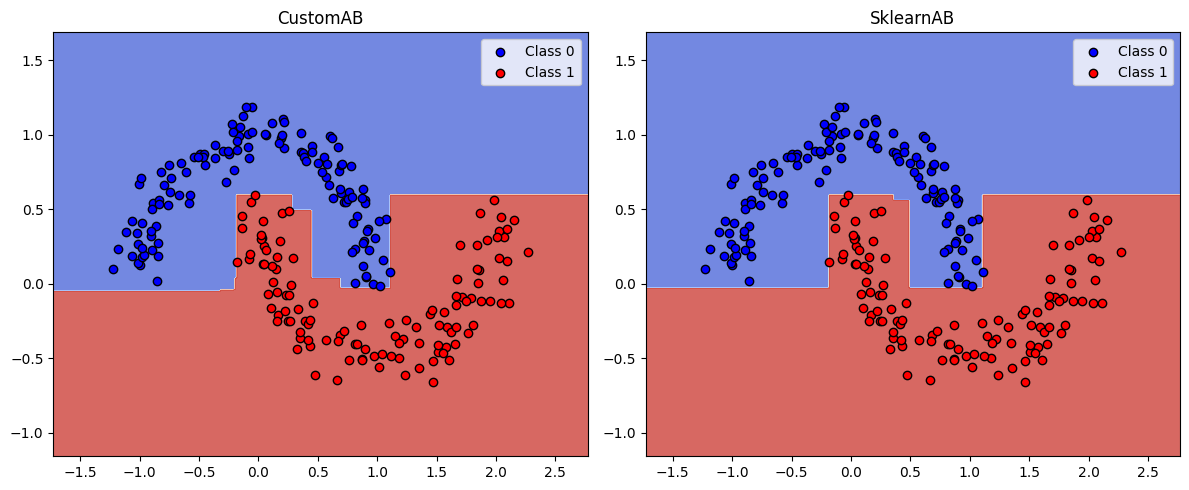

In [4]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 5))

plot_decision_boundary(cab, X_train, y_train, ax1, "CustomAB")
plot_decision_boundary(ab, X_train, y_train, ax2, "SklearnAB")

plt.tight_layout()

In [5]:
cab = CustomAB(KernelizedSVC())
ab = AdaBoostClassifier(SVC(), algorithm="SAMME")

dataset = load_breast_cancer()
X, y = dataset.data, dataset.target
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cab.fit(X_train, y_train)
ab.fit(X_train, y_train)

y_pred_cab = cab.predict(X_test)
y_pred_ab = ab.predict(X_test)

print("CustomAB Accuracy", accuracy_score(y_test, y_pred_cab))
print("SklearnAB Accuracy", accuracy_score(y_test, y_pred_ab))

CustomAB Accuracy 0.9649122807017544
SklearnAB Accuracy 0.6228070175438597


In [6]:
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cab.fit(X_train, y_train)
y_pred = cab.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [13]:
cab = CustomAB(GaussianNB())
ab = AdaBoostClassifier(GaussianNB(), algorithm="SAMME")

dataset = load_breast_cancer()
X, y = dataset.data, dataset.target
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cab.fit(X_train, y_train)
ab.fit(X_train, y_train)

y_pred_cab = cab.predict(X_test)
y_pred_ab = ab.predict(X_test)

print("CustomAB Accuracy", accuracy_score(y_test, y_pred_cab))
print("SklearnAB Accuracy", accuracy_score(y_test, y_pred_ab))

CustomAB Accuracy 0.9473684210526315
SklearnAB Accuracy 0.9649122807017544


In [ ]:
X, y = make_classification(
    n_samples=5000,
    n_features=20,
    n_informative=5,       
    n_redundant=10,        
    n_clusters_per_class=2,
    flip_y=0.1,            
    class_sep=0.5,         
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

cab.fit(X_train, y_train)
ab.fit(X_train, y_train)

y_pred_cab = cab.predict(X_test)
y_pred_ab = ab.predict(X_test)

print("CustomAB Accuracy", accuracy_score(y_test, y_pred_cab))
print("SklearnAB Accuracy", accuracy_score(y_test, y_pred_ab))

CustomAB Accuracy 0.766
SklearnAB Accuracy 0.757


In [ ]:
def compare_models(X, y, model_a, model_b, test_size=0.2, random_state=42):
    """
    Compare two models on the same dataset (X, y) and print accuracy and F1 scores.

    Parameters:
    - X, y: Dataset features and labels.
    - model_a: First model (e.g., custom AdaBoost).
    - model_b: Second model (e.g., sklearn AdaBoost).
    - test_size: Proportion of the test set.
    - random_state: Seed for reproducibility.

    Returns:
    - A dictionary with results from both models.
    """
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Train and predict with model A
    model_a.fit(X_train, y_train)
    y_pred_a = model_a.predict(X_test)

    # Train and predict with model B
    model_b.fit(X_train, y_train)
    y_pred_b = model_b.predict(X_test)

    # Evaluate
    acc_a = accuracy_score(y_test, y_pred_a)
    f1_a = f1_score(y_test, y_pred_a)

    acc_b = accuracy_score(y_test, y_pred_b)
    f1_b = f1_score(y_test, y_pred_b)

    # Output
    print("=== Model A ===")
    print(f"Accuracy: {acc_a:.4f}")
    print(f"F1 Score: {f1_a:.4f}")
    print()
    print("=== Model B ===")
    print(f"Accuracy: {acc_b:.4f}")
    print(f"F1 Score: {f1_b:.4f}")

    return {
        "model_a": {"accuracy": acc_a, "f1_score": f1_a},
        "model_b": {"accuracy": acc_b, "f1_score": f1_b}
    }


In [22]:
X, y = fetch_openml("spambase", version=1, as_frame=False, return_X_y=True)
X = X.astype(float)
y = y.astype(int)

custom_ab = CustomAB(estimator=GaussianNB())
sklearn_ab = AdaBoostClassifier(estimator=GaussianNB(), algorithm="SAMME")

compare_models(X, y, custom_ab, sklearn_ab)

=== Model A ===
Accuracy: 0.8371
F1 Score: 0.8219

=== Model B ===
Accuracy: 0.8339
F1 Score: 0.8189


{'model_a': {'accuracy': 0.8371335504885994, 'f1_score': 0.8218527315914489},
 'model_b': {'accuracy': 0.8338762214983714, 'f1_score': 0.8189349112426035}}